# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat


[notice] A new release of pip is available: 24.1.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
# import datasets and transformations (reusability purposes)
from IPython import get_ipython

get_ipython().run_line_magic('run', 'datasets.ipynb')

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_8016/549573036.py:4: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv('../datasets/stock_forecasting/2022-2025/[LT] Products [STOCK].txt', sep='\t', header=0) # stock
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_8016/549573036.py:5: DtypeWarning: Columns (5,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv('../datasets/stock_forecasting/2022-2025/[LT] Tickets [CUSTOM] [ITEMS].txt', sep='\t', header=0) # customer order items
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_8016/549573036.py:6: DtypeWarning: Columns (43,57,105,140,211,246,253,291,295,312,323,326,328,346,350) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv('../datasets/stock_forecasting/2022-2025/[LT] Tickets [CUSTOM] [MAIN].txt', sep='\t', head

-------------- Product [STOCK] ----------------
   Adhesive  Alternate  Available  BackOrdered Box_Size  CaseQty Color  \
0       NaN        NaN          0            0      NaN      NaN   NaN   
1       NaN        NaN          0            0      NaN      NaN   NaN   
2       NaN        NaN          0            0      NaN      NaN   NaN   
3       NaN        NaN          0            0      NaN      NaN   NaN   
4       NaN        NaN          0            0      NaN      NaN   NaN   

   Commission   Cost  Currency_ExchangeRate  ...  SupplierName  SupplierNo  \
0           0   0.00                      0  ...           NaN         NaN   
1           0   0.00                      0  ...           NaN         NaN   
2           0   0.00                      0  ...           NaN         NaN   
3           0   0.00                      0  ...           NaN         NaN   
4           0  49.11                      0  ...           NaN         NaN   

  SupplierNotes SupplierPartNo Tag Tot

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_8016/1452763417.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'], errors='coerce')
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_8016/1452763417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(merged_data['OrderDate'], errors='coerce')
/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_8016/1452763417.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. T

In [4]:
# create solution to add each first three unique values of the column 'ProductNumber' to a list
products_by_customer = set()

# loop through all product numbers
for index, row in product_sales.iterrows():
    product = row['ProductNumber']
    for i in range(len(product) - 2):
        customer_code = product[i:i+3]  # get the first three characters of the product number

        # add the customer code to the set
        products_by_customer.add(customer_code)

        # create a list for each customer code / if it exists, add it to the existing customer code list
        if f'custom_code_{customer_code}' in locals():
            locals()[f'custom_code_{customer_code}'].append(row.to_dict())
        else:
            locals()[f'custom_code_{customer_code}'] = [row.to_dict()]

print(f"All custom codes for existing products: \n{products_by_customer} \n ------------------------------------")

# Example to print one of the custom code lists
if 'custom_code_FRE' in locals():
    print(f"Records for custom code FRE: \n{locals()['custom_code_FRE']}")

All custom codes for existing products: 
{'VER', '556', 'AF-', '196', 'FC-', 'LA-', 'PFG', '855', 'NOV', '63S', '889', 'F-0', '59Y', '08W', '304', '64U', 'KAL', '422', '22X', '02W', '335', '67Y', '747', '477', '277', '46V', '7-0', '22U', '47X', '10V', '759', 'PRA', 'N-T', '80Z', 'JMF', 'RI-', '53W', 'OWS', '33Y', 'OF-', '464', '745', '778', '343', 'ARW', '30T', '49Y', '696', 'LEM', '099', '988', '89Z', '598', 'RR-', 'RL-', '401', '49X', '003', '725', '95Y', '16U', 'XP-', '905', '449', '06Y', '292', '149', '351', '850', '7Y-', 'BIO', '46U', '09R', '399', '94Y', '287', '247', '12Q', 'STA', '41X', 'CON', '723', '34X', '16V', '28Y', '604', '85Y', 'LB-', '24Y', 'MEN', '217', '648', '13T', 'TOG', 'OR-', 'Y-T', 'SQU', '024', '34V', '42Z', '10S', '528', '61V', '635', '947', 'PPC', '801', '242', '100', '36Z', '78X', '078', '45W', 'PSF', '722', '5X-', '809', 'PJR', '118', 'LU-', '06Z', 'RX-', '071', '55V', '63Y', '60Y', '014', '682', 'EVR', '71Z', '37W', '698', '414', '594', '458', '87W', 'Y-3',

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# define the features and target variable from 'product_sales'
# convert custom_code_FRE to a DataFrame
custom_code_df = pd.DataFrame(custom_code_ALB)

In [6]:
# define the features and target variable from 'custom_code_FRE_df'
X = custom_code_df[['ProductNumber', 'order_month', 'PhysicalInv']]
y = custom_code_df['OrderQuantity']

# convert 'ProductNumber' to numeric values
label_encoder = LabelEncoder()
X['ProductNumber'] = label_encoder.fit_transform(X['ProductNumber'])

# normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test split with scaled features
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

/var/folders/31/9bd8ksys1rzbjk8qs9scl95h0000gn/T/ipykernel_8016/1649738728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ProductNumber'] = label_encoder.fit_transform(X['ProductNumber'])


In [7]:
from sklearn.ensemble import RandomForestRegressor
import sys
sys.path.append('../src')
from model_utils import find_best_hyperparameters, param_grids, evaluate_model

# train the model with scaled features (Random Forest Regressor)
rf = RandomForestRegressor()
rf_params = find_best_hyperparameters(rf, param_grids(rf.__class__.__name__), X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=squared_error, max_depth=5, min_samples_leaf=1, 

In [8]:
rf = RandomForestRegressor(**rf_params)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_val_scaled)

In [9]:
evaluate_model(rf, X_scaled, y)
print('--------------------------------------------')

Evaluating model...
Model: RandomForestRegressor


KeyboardInterrupt: 

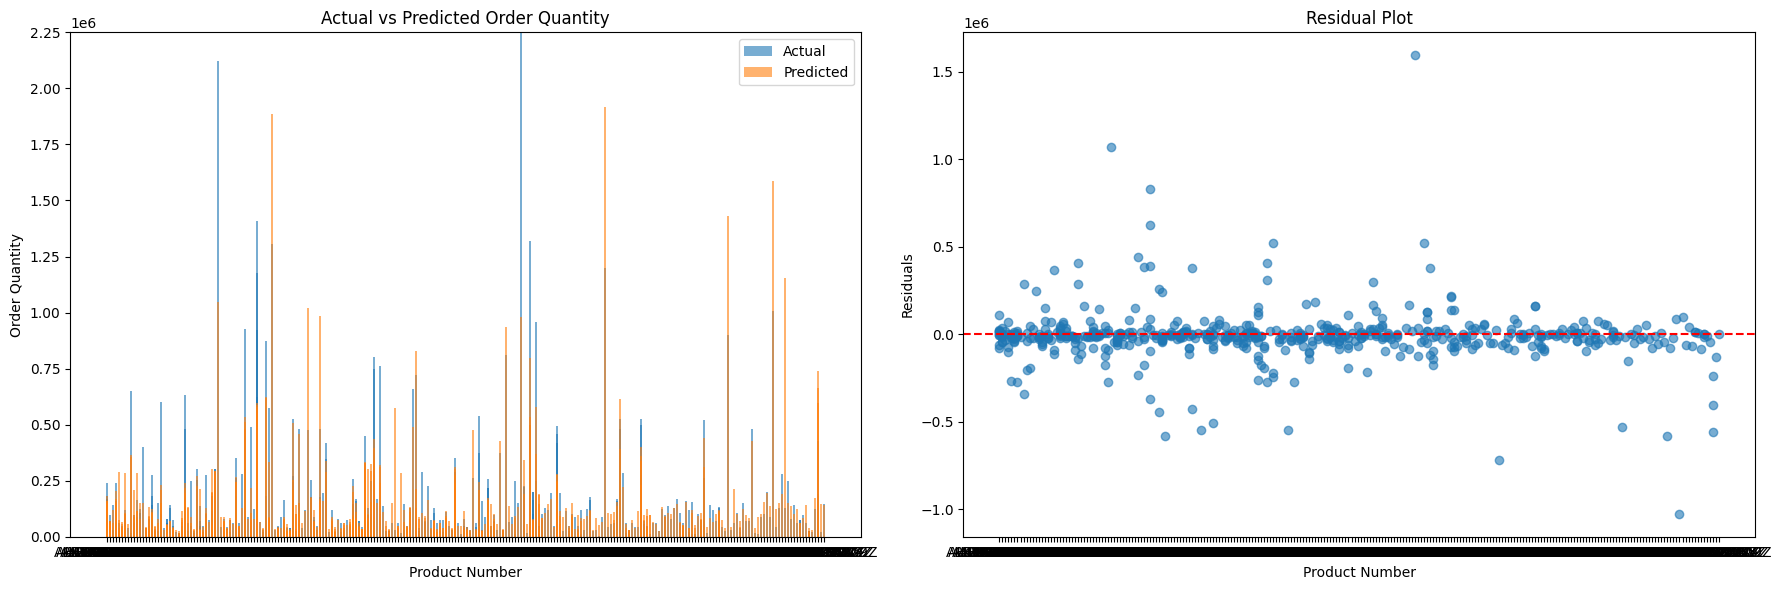

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot the bar plot to compare the actual and predicted values
axes[0].bar(product_sales.loc[y_val.index, 'ProductNumber'], y_val, label='Actual', alpha=0.6)
axes[0].bar(product_sales.loc[y_val.index, 'ProductNumber'], y_pred_rf, label='Predicted', alpha=0.6)
axes[0].set_xlabel('Product Number')
axes[0].set_ylabel('Order Quantity')
axes[0].set_title('Actual vs Predicted Order Quantity')
axes[0].set_ylim(0, 2250000)
axes[0].legend()

# Plot the residual plot
residuals = y_val - y_pred_rf
axes[1].scatter(product_sales.loc[y_val.index, 'ProductNumber'], residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Product Number')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# plot a confusion matrix to show the performance of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# create a confusion matrix
confusion_matrix(y_val, y_pred_rf)

# plot the confusion matrix
plot_confusion_matrix(rf, X_val_scaled, y_val, cmap='Blues', normalize='true')
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/mwilko777/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/metrics/__init__.py)